In [1]:
from datascience import *
from path_data_variable import *
import numpy as np
from scipy import stats

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
family_heights = Table.read_table(path_data + 'family_heights.csv')
heights = family_heights.select('midparentHeight', 'childHeight')
heights = heights.relabel(0, 'MidParent').relabel(1, 'Child')
hybrid = Table.read_table(path_data + 'hybrid.csv')

In [3]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def correlation(table, x, y):
    x_in_standard_units = standard_units(table.column(x))
    y_in_standard_units = standard_units(table.column(y))
    return np.mean(x_in_standard_units * y_in_standard_units)

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) -  a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [4]:
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

In [5]:
heights = heights.with_columns(
        'Fitted Value', fit(heights, 'MidParent', 'Child'),
        'Residual', residual(heights, 'MidParent', 'Child')
    )
heights

MidParent | Child | Fitted Value | Residual
75.43     | 73.2  | 70.7124      | 2.48763
75.43     | 69.2  | 70.7124      | -1.51237
75.43     | 69    | 70.7124      | -1.71237
75.43     | 69    | 70.7124      | -1.71237
73.66     | 73.5  | 69.5842      | 3.91576
73.66     | 72.5  | 69.5842      | 2.91576
73.66     | 65.5  | 69.5842      | -4.08424
73.66     | 65.5  | 69.5842      | -4.08424
72.06     | 71    | 68.5645      | 2.43553
72.06     | 68    | 68.5645      | -0.564467
... (924 rows omitted)

In [6]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

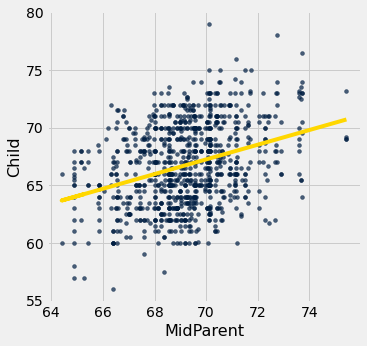

In [7]:
scatter_fit(heights, 'MidParent', 'Child')

In [8]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

In [9]:
residual_plot(heights, 'MidParent', 'Child')

In [10]:
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

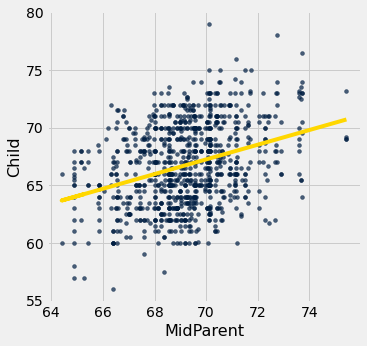

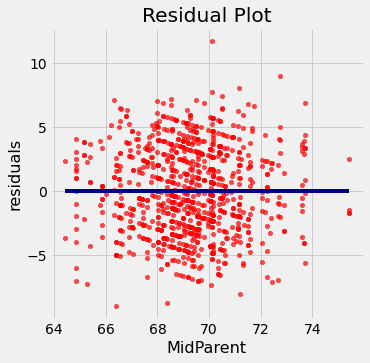

In [11]:
regression_diagnostic_plots(heights, 'MidParent', 'Child')

In [12]:
dugong = Table.read_table(path_data + 'dugongs.csv')
dugong = dugong.move_to_start('Length')
dugong

Length | Age
1.8    | 1
1.85   | 1.5
1.87   | 1.5
1.77   | 1.5
2.02   | 2.5
2.27   | 4
2.15   | 5
2.26   | 5
2.35   | 7
2.47   | 8
... (17 rows omitted)

In [13]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

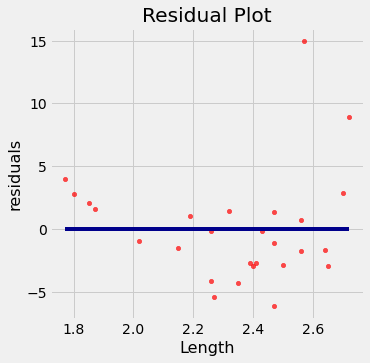

In [14]:
regression_diagnostic_plots(dugong, 'Length', 'Age')

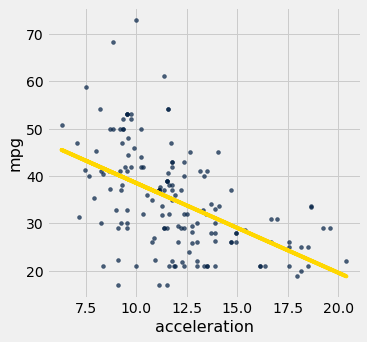

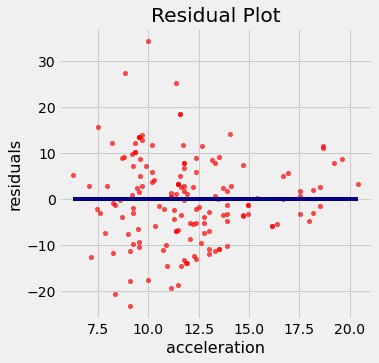

In [15]:
regression_diagnostic_plots(hybrid, 'acceleration', 'mpg')